**Context**
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

Some business Objectives for the case study could be:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

**Instructions**
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.read_csv(""))
3. First, look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

### 1. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset.

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First, look at its main features (head, shape, info).

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
customer_df.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [7]:
customer_df.columns = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]

In [8]:
customer_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Fix the data types.

All data types are correct in relation to the content of the column. I only change the column 'effective_to_date' to datetime since it contains only dates.

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
print(customer_df['effective_to_date'].dtype)

datetime64[ns]


### 6. Plot a correlation matrix, and comment on what you observe.

In [10]:
customer_df.isna().any()

customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employment_status                False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
dtype: bool

In [11]:
nums = customer_df.select_dtypes(include=[np.number])
nums.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

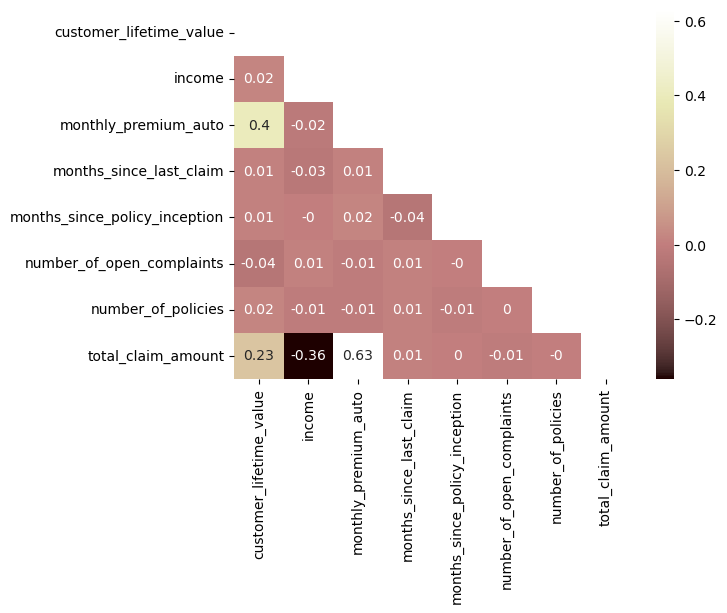

In [12]:
# I create a mask to then show only half of the heatmap. 
mask = np.zeros_like(nums.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(nums.corr(),2), cmap='pink', annot=True, mask=mask)
plt.show()

- Customer lifetime value has a strong positive correlation with monthly premium auto (0.40) and a moderate positive correlation with total claim amount (0.23).
- Income has a moderate negative correlation with total claim amount (-0.36).
- Monthly premium auto has a strong positive correlation with total claim amount (0.63).
- Months since last claim, months since policy inception, number of open complaints, and number of policies have weak correlations with the other variables in the dataset.

If total claim amount is our target value, taking into account the customer's lifetime value and their monthly premium auto as well as their income would help us to predict future claim amounts. The other columns could be dropped due to insignificance.

### 7. Plot every continuous variable. Comment what you can see in the plots.

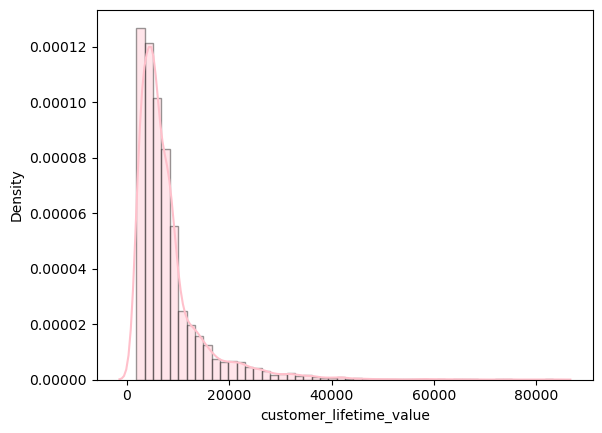

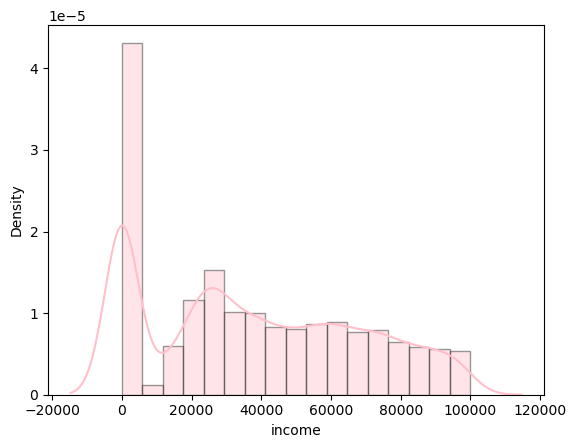

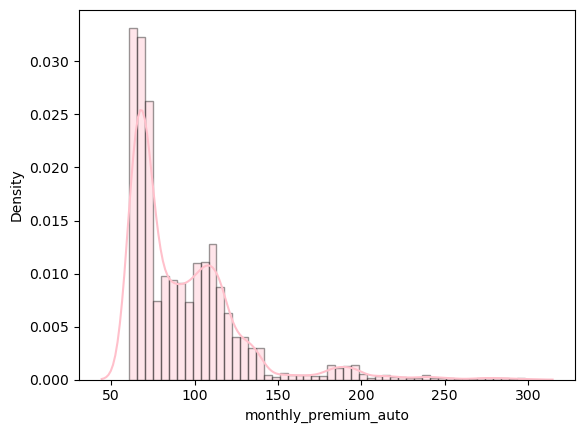

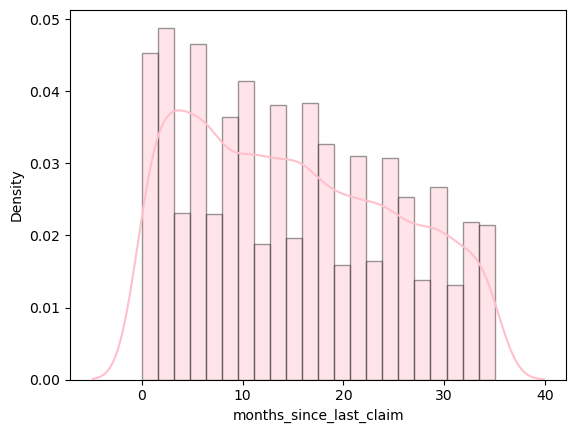

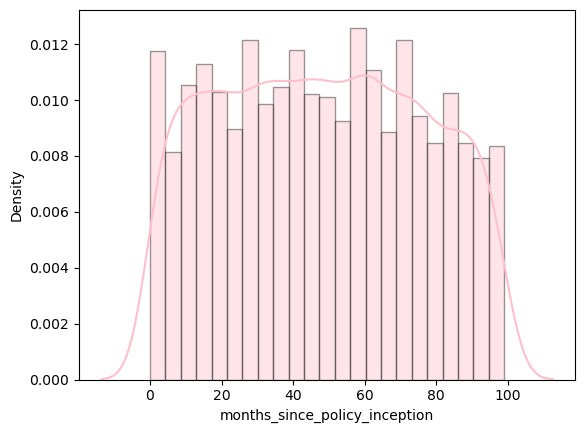

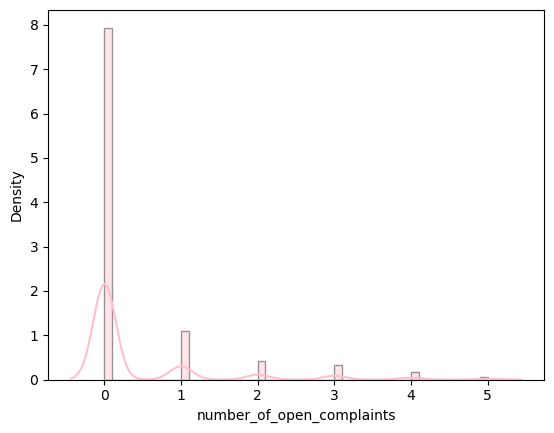

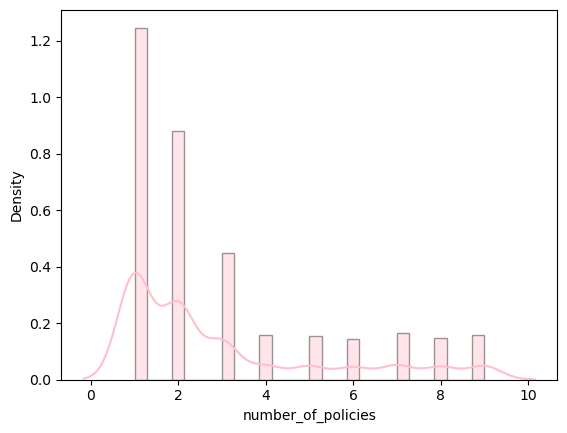

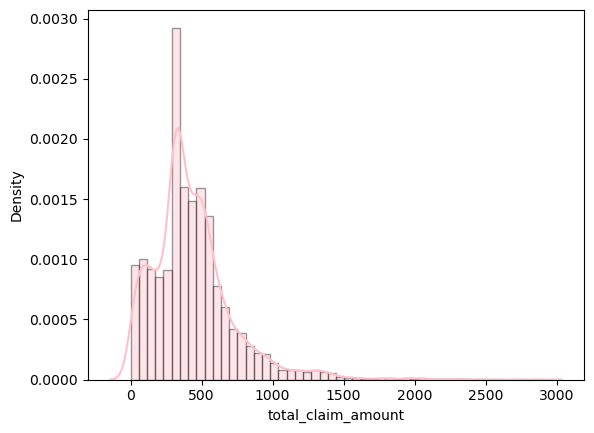

In [13]:
for column in nums.columns:
    sns.distplot(nums[column], color='pink', hist_kws={'linewidth': 1, 'edgecolor': 'black'})
    plt.show()

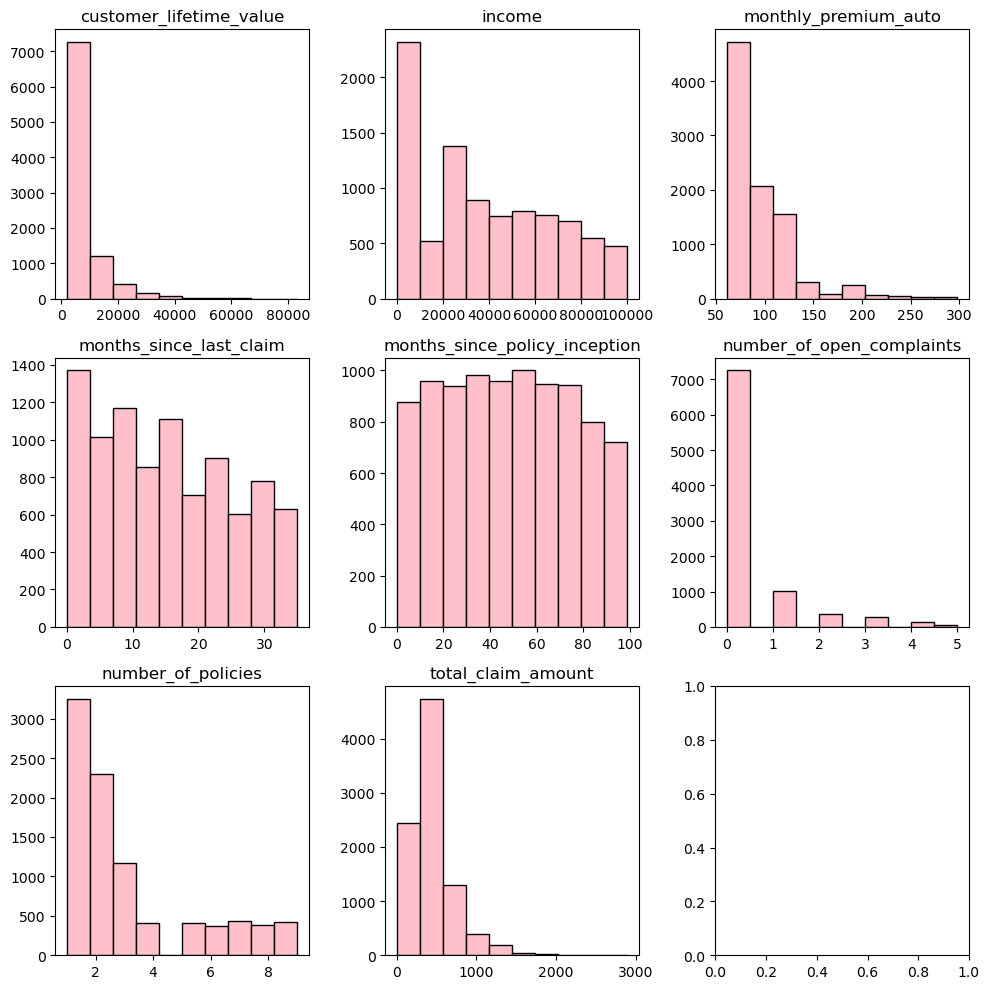

In [14]:
# I create a matrix of the required size.
fig, axs = plt.subplots(3, 3, figsize=(10, 10)) 
axs = axs.flatten()

# I iterate through the different numeric columns, add a frame color and set a title for each histogram.
for i, column in enumerate(nums.columns):
    axs[i].hist(nums[column], color='pink', edgecolor='black')
    axs[i].set_title(column)

# I improve the layout, because the plots were displayed too close to each other.
plt.tight_layout()
plt.show()

The distribution of the customer lifetime value, the income, monthly premium auto, and the total claim amount appear to be somewhat bell-shaped and symmetric, which could indicate a normal distribution.
The variable number of policies and number of open complaints only take very few different values, which supports the conclusion from the correlation matrix of their insignificance to predict the target.
For months since last claim and months since policy inception there are more different values but still within a overall small range. Here again, the value for one customer does not differ much from the one of another customer, hence the impact on the target is negligible.

### 8. Do the same with the categorical variables. Comment what you can see in the plots.

I set the customer ID, which is unique, as the index instead of deleting it. This way, if necessary, I could use it later on again. 
This type of column is known as an "identifier" and it should be removed before building the model because it can lead to overfitting and incorrect predictions.
Additionally, since the customer ID is a categorical variable using it in a machine learning model would result in the creation of many dummy variables, which can increase the complexity of the model and lead to issues such as multicollinearity.

In [15]:
customer_df = customer_df.set_index('customer')

In [16]:
cats = customer_df.select_dtypes(include=[np.object])
cats.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

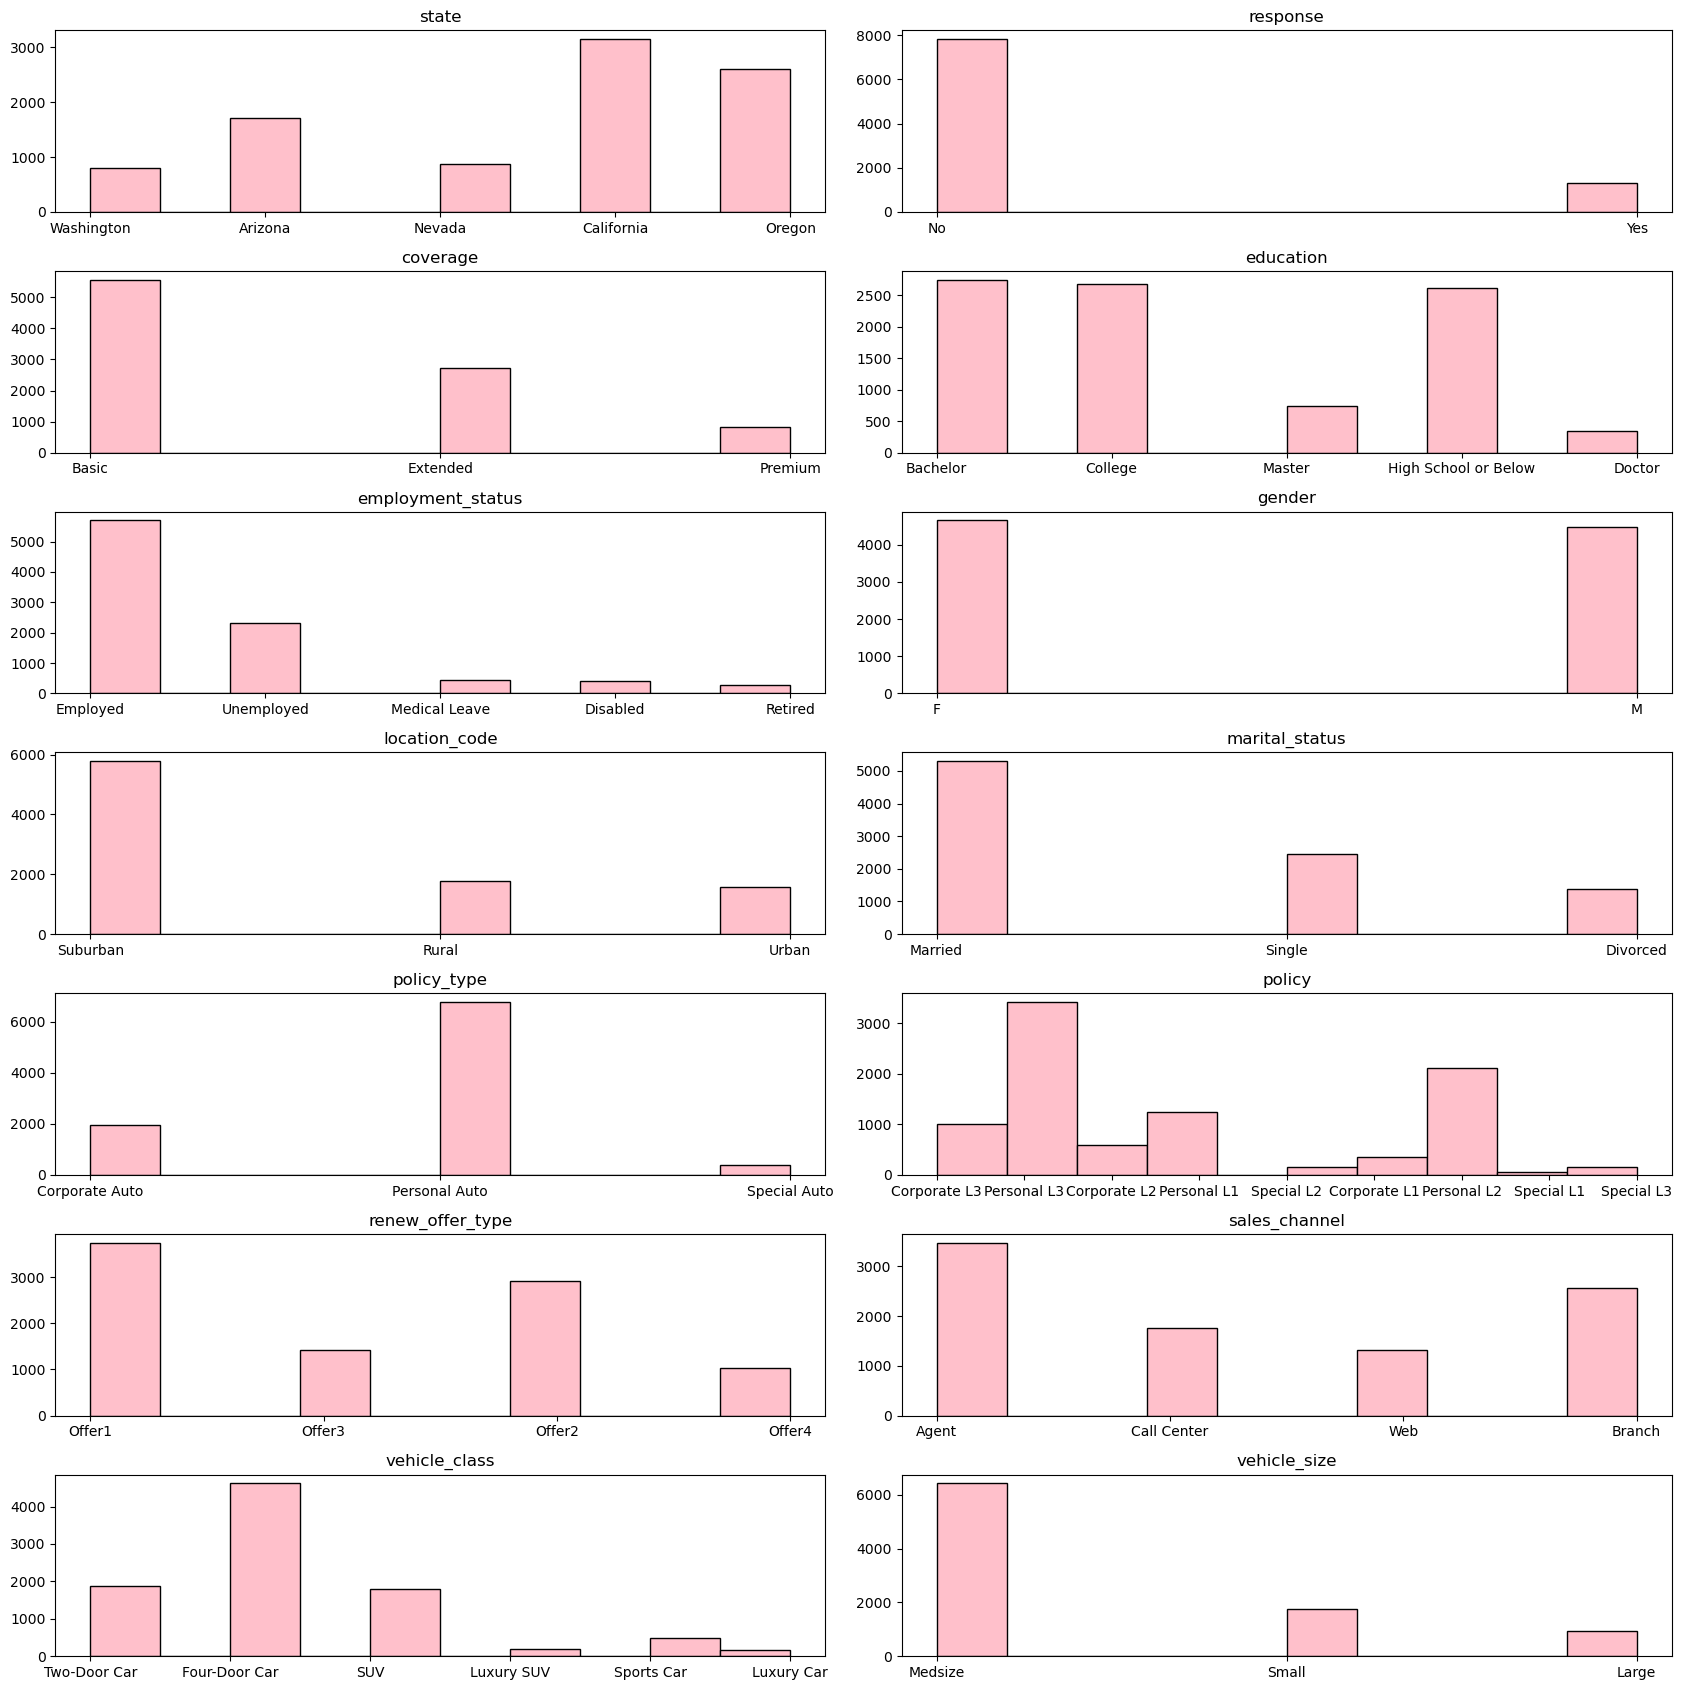

In [17]:
# I create a matrix of the required size.
fig, axs = plt.subplots(7, 2, figsize=(17, 17)) 
axs = axs.flatten()

# I iterate through the different columns, add a frame color and set a title for each histogram.
for i, column in enumerate(cats.columns):
    axs[i].hist(cats[column], color='pink', edgecolor='black')
    axs[i].set_title(column)

# I improve the layout, because the plots were displayed too close to each other.
plt.tight_layout()
plt.show()

To summarize a few key findings:
- The dataset only encompasses 5 different locations. Most of the customers are located in either California or Oregon.
- A majority of the customers have a basic coverage level and are employed.
- There is a roughly equal number of male and female customers.
- The most common policy type is personal auto, and the most common sales channel is through an agent.
- The majority of the customers have a bachelor's degree or college education level. Higher degrees are rare.
- The renew offer type as well as the sales channel does not provide much insight.

### 9. Look for outliers in the continuous variables. Comment on what you will do with them.

In [18]:
len(nums)

9134

Both box plots and scatter plots (e.g. as sns.pairplot) are useful for identifying outliers in continuous variables. But with 9134 data points, a box plot is a more appropriate choice as it provides an exact summary of the distribution of the data and can easily highlight any potential outliers. 

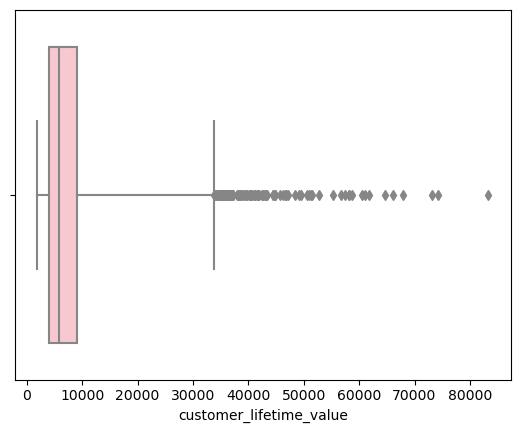

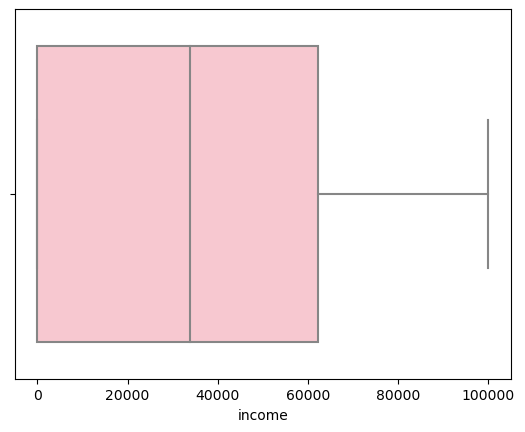

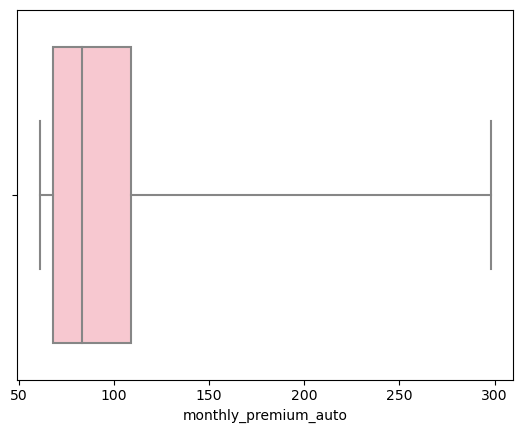

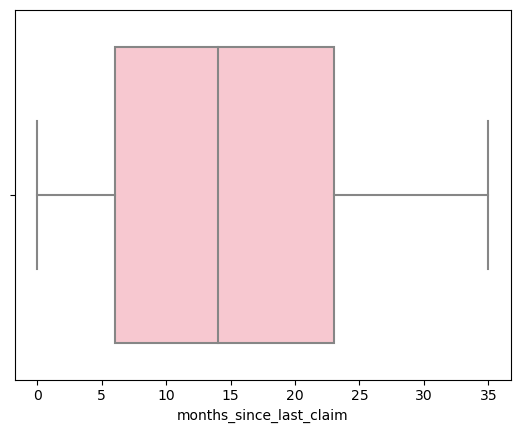

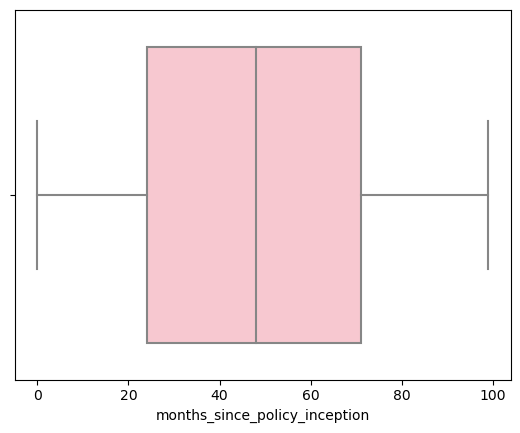

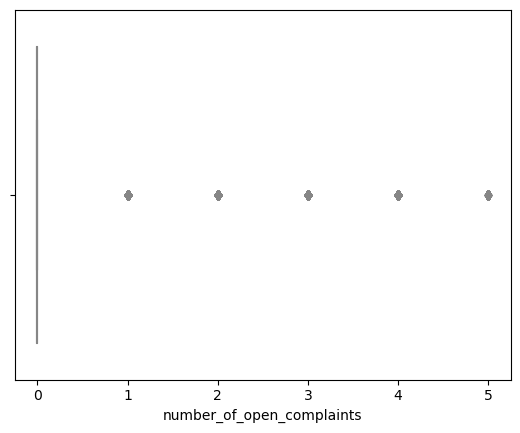

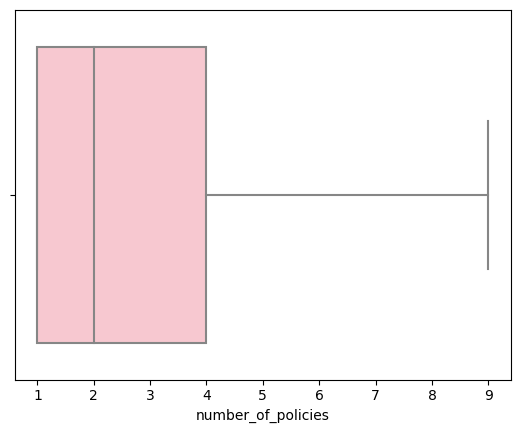

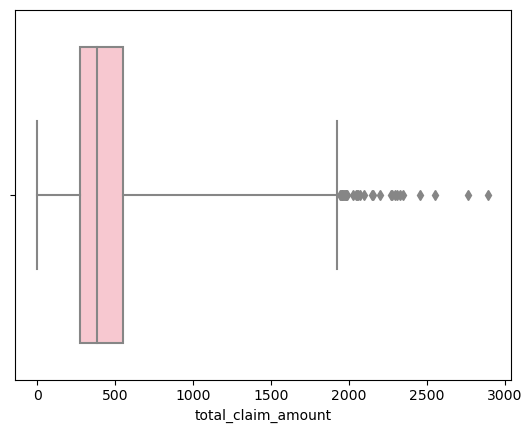

In [19]:
for var in nums:
    sns.boxplot(x=nums[var], whis=5, color='pink')
    plt.show()

I will remove most of the outliers from the columns 'customer_lifetime_value' and 'total_claim_amount' because there are many and both variables are important for a prospective machine learning model. The column 'number_of_open_complaints' shows outliers in the boxplot, but these cannot be considered true outliers since the column only has 6 distinct values (see below).

In [20]:
nums.number_of_open_complaints.nunique()

6

In [21]:
nums.customer_lifetime_value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [22]:
# I calculate the first and the third quartile.
lower = np.percentile(nums['customer_lifetime_value'], 25)
upper = np.percentile(nums['customer_lifetime_value'], 75)

# The iqr.
iqr = upper - lower

# And the upper and lower limits defining the treshold at 2 times the iqr.
upper_limit = upper + 2 * iqr
lower_limit = lower - 2 * iqr

# Then I filter the data in the column.
nums = nums[(nums['customer_lifetime_value'] > lower_limit) & (nums['customer_lifetime_value'] < upper_limit)]

I am using a treshold of 2 times the iqr to calculate the limits for removing outliers. When using 1.5 as a treshold I reduced the data too much cutting also values that might be important for a prediction model. Comparing the limit of the boxplot with the 75% as well as the max value of customer lifetime value, I consider a larger treshold a better choice.

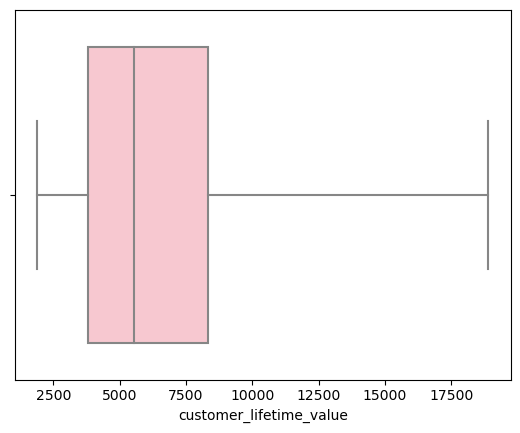

In [23]:
sns.boxplot(x='customer_lifetime_value', data=nums, whis=5, color='pink')
plt.show()

In [24]:
nums.total_claim_amount.describe()

count    8493.000000
mean      425.212873
std       278.083248
min         0.099007
25%       269.905129
50%       376.502488
75%       542.400000
max      2893.239678
Name: total_claim_amount, dtype: float64

In [25]:
total_claim_amount_threshold = nums['total_claim_amount'].quantile(0.95)
nums_filtered = nums[nums['total_claim_amount'] <= total_claim_amount_threshold]

In this first try I keep the values that fall within the range of the middle 95% of the data and remove the values that fall outside of this range, which I consider outliers. In comparison to the max value existent in the column I feel this might be too much reduction (see plot below). 

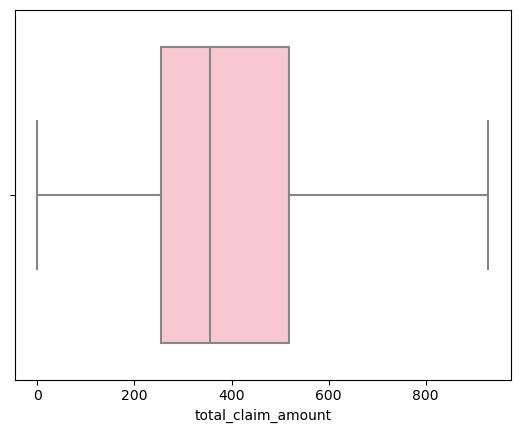

In [26]:
sns.boxplot(x='total_claim_amount', data=nums_filtered, whis=5, color='pink')
plt.show()

In [27]:
lower = np.percentile(nums['total_claim_amount'], 25)
upper = np.percentile(nums['total_claim_amount'], 75)

iqr = upper - lower

upper_limit = upper + 2 * iqr
lower_limit = lower - 2 * iqr

nums = nums[(nums['total_claim_amount'] > lower_limit) & (nums['total_claim_amount'] < upper_limit)]

In the second try, I calculate again using the iqr. Again I decide to set the treshold a bit higher to 2 looking at the max value.

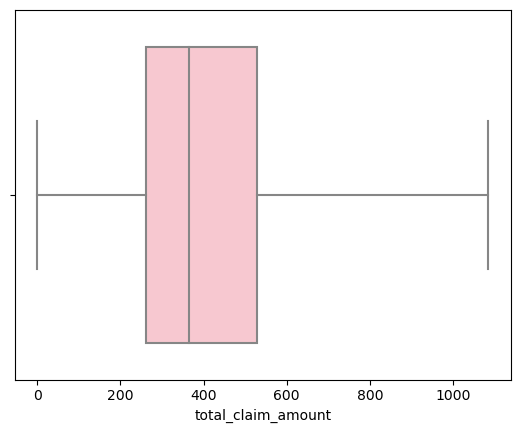

In [28]:
sns.boxplot(x='total_claim_amount', data=nums, whis=5, color='pink')
plt.show()

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

See 6., I already checked before doing the correlation matrix.

In [29]:
nums.to_csv('numericals.csv')